# Part 1 - Exploratory Data Analysis
In this section, we will:
- Import necessary packages for executing the code
- Load the data
- Convert qualitative predictor variables to the *category* data type
- Conduct EDA on the data set using various visualizations and pivot tables

In [2]:
# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Load the data and take a look at it
df = pd.read_csv('health_nuts_data.csv')
df.head()

,Salary,Age,State,Gender,Marital Status,Repeat,Type,Coupon,Spending
0,46466.0,37.0,IL,Female,Single,No,Weight Loss,USPS,113.76
1,47365.0,46.0,FL,Female,Married,No,Weight Loss,USPS,119.09
2,48079.0,48.0,NJ,Female,Married,Yes,Weight Loss,Email,154.21
3,48557.0,18.0,TX,Female,Single,No,Protein,Email,113.99
4,49257.0,38.0,FL,Female,Single,Yes,Weight Loss,NaN,161.24


Note that the target variable here is *Spending* whereas the other variables are treated as predictors.

In [4]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Salary          1140 non-null   float64
 1   Age             1140 non-null   float64
 2   State           1140 non-null   object 
 3   Gender          1140 non-null   object 
 4   Marital Status  1140 non-null   object 
 5   Repeat          1140 non-null   object 
 6   Type            1140 non-null   object 
 7   Coupon          731 non-null    object 
 8   Spending        1140 non-null   float64
dtypes: float64(3), object(6)
memory usage: 80.4+ KB


Note that *Salary*, *Age* and *Spending* are numeric variables whereas the others are of the data type *object*.

In [5]:
df.loc[df['Coupon'].isna(),'Coupon'] = 'None'
df['Coupon'].unique()

array(['USPS', 'Email', 'None'], dtype=object)

In [6]:
# Convert qualitative predictors to the 'category' data type
categorical_columns = ['State', 'Gender', 'Marital Status', 'Repeat', 'Type', 'Coupon']
df[categorical_columns] = df[categorical_columns].astype('category')

In [7]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Salary          1140 non-null   float64 
 1   Age             1140 non-null   float64 
 2   State           1140 non-null   category
 3   Gender          1140 non-null   category
 4   Marital Status  1140 non-null   category
 5   Repeat          1140 non-null   category
 6   Type            1140 non-null   category
 7   Coupon          1141 non-null   category
 8   Spending        1140 non-null   float64 
dtypes: category(6), float64(3)
memory usage: 34.8 KB


Note that the qualitative variables are now of the *category* data type.

## EDA: Visualizations

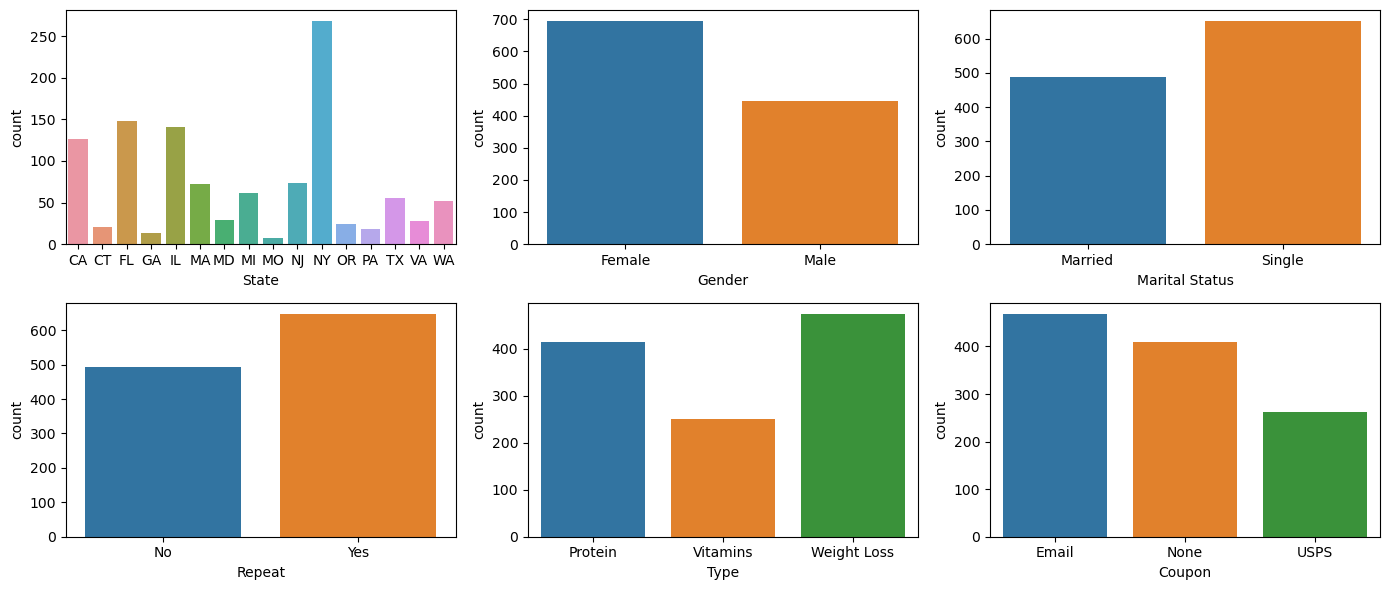

In [8]:
# Create count plots for the categorical variables
plt.figure(figsize = (14, 6))

fignum = 0
for featurename in categorical_columns:
    fignum = fignum + 1
    plt.subplot(2, 3, fignum)
    sns.countplot(data = df, x = featurename)
    
plt.tight_layout();

Count plots are useful to get a sense of the distribution of occurence of the different levels of categorical variables in the data set.

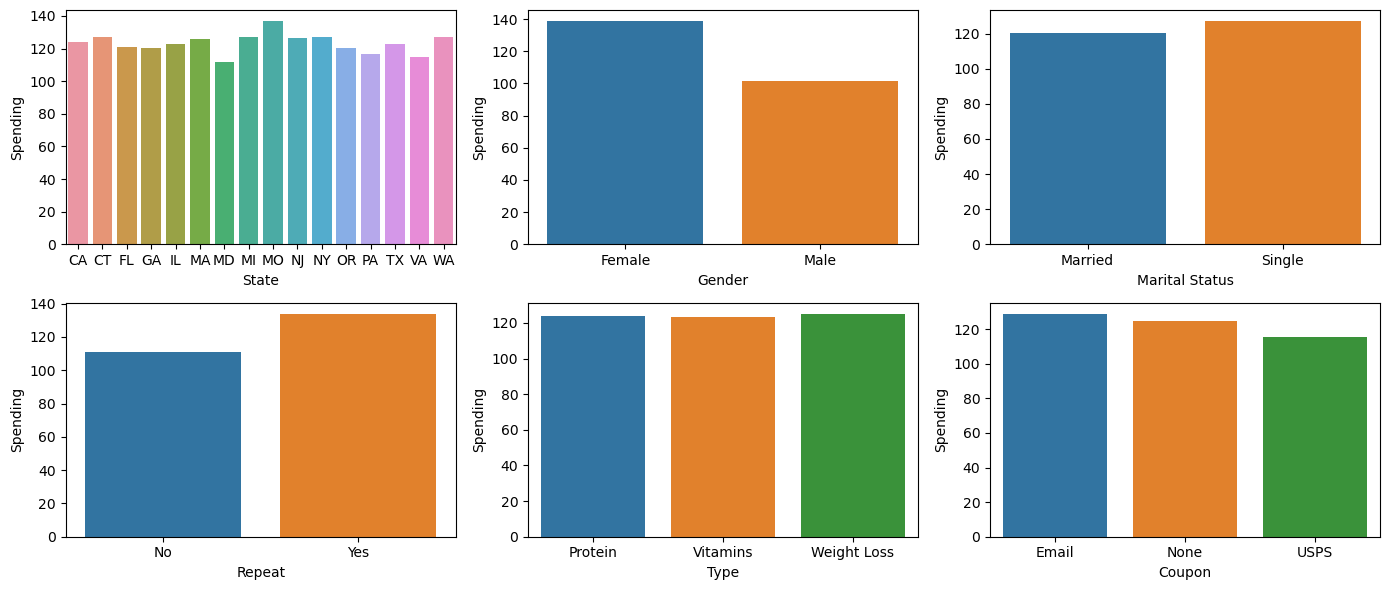

In [9]:
# Create bar plots for the categorical variables with 'Spending' on the Y-axis
plt.figure(figsize = (14, 6))

fignum = 0
for featurename in categorical_columns:
    fignum = fignum + 1
    plt.subplot(2, 3, fignum)
    sns.barplot(x = df[featurename], y = df['Spending'], errorbar = None)
    
plt.tight_layout();

The bar plots here help us compare the value of the *Spending* variable between different levels of categorical variables.

C:\Users\Pratyush Srivastava\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


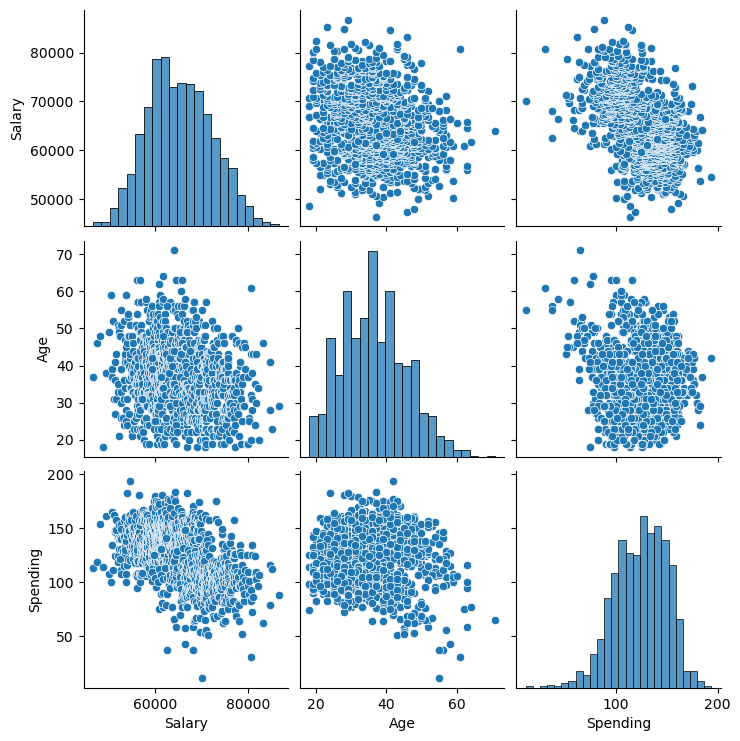

In [10]:
# Create a pair plot for the numerical features in the data set
sns.pairplot(df);

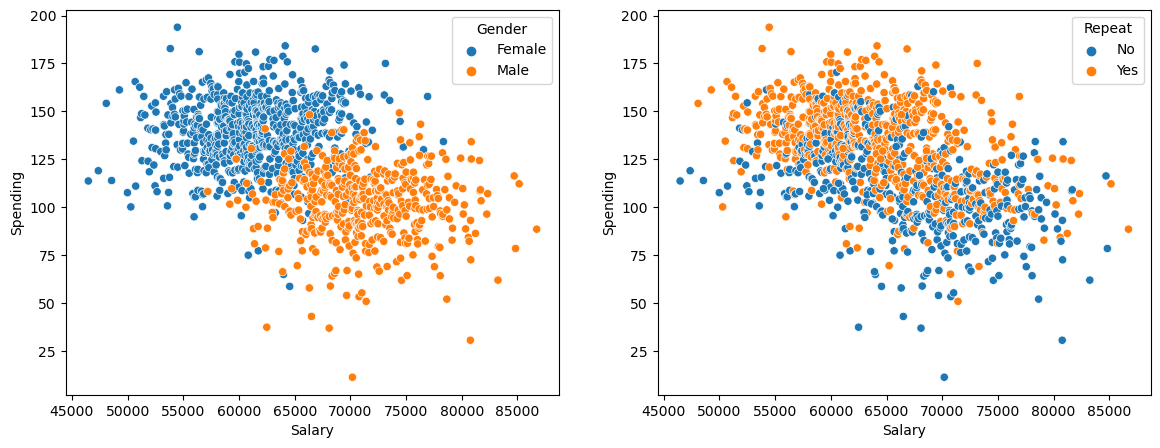

In [11]:
# Create scatter plots of 'Spending' versus 'Salary', one colored by 'Gender' and the other by 'Repeat'
plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'Salary', y = 'Spending', hue = 'Gender')
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = 'Salary', y = 'Spending', hue = 'Repeat');

It is interesting to note that the people with higher salaries and lower spendings are men whereas the people with lower salaries and higher spendings are women.

## EDA: Pivot Tables

In [12]:
# Create a pivot table of count of 'Spending' with respect to 'Gender' and 'Repeat'
pd.pivot_table(data = df, values = 'Spending', index = 'Gender', columns = 'Repeat', aggfunc = 'count', margins = True)

Repeat,No,Yes,All
Gender,,,
Female,236,458,694
Male,256,190,446
All,492,648,1140


The entries in this pivot table are counts or frequencies of occurence of the different levels of the categorical variables *Gender* and *Repeat*.

In [13]:
# Create a pivot table of mean 'Spending' with respect to 'Gender' and 'Coupon'
pd.pivot_table(data = df, values = 'Spending', index = 'Gender', columns = 'Coupon', aggfunc = 'mean', margins = True)

Coupon,Email,None,USPS,All
Gender,,,,
Female,141.030987,141.649732,129.726346,138.689597
Male,104.406194,103.794054,93.746509,101.618812
All,128.926844,124.526748,115.169618,124.186465


The entries in this pivot table are mean *Spending* values for the different divisions in the table.

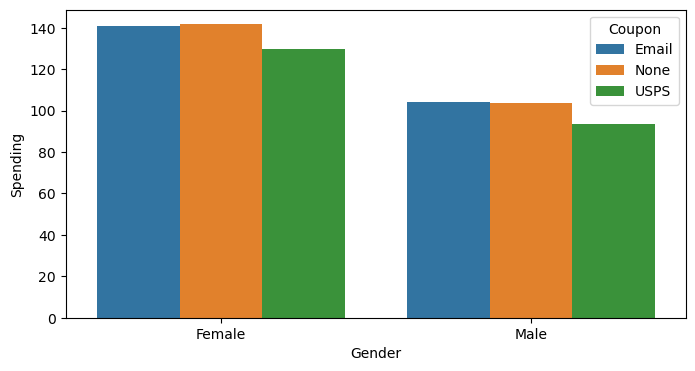

In [14]:
# Create a bar plot corresponding to the pivot table above
plt.figure(figsize = (8, 4))
sns.barplot(data = df, x = 'Gender', y = 'Spending', hue = 'Coupon', errorbar = None);

In [15]:
pd.pivot_table(data = df, values = 'Spending', index = 'Type', columns = 'Marital Status', aggfunc = 'mean')

Marital Status,Married,Single
Type,,
Protein,118.446767,126.049468
Vitamins,117.644948,126.800523
Weight Loss,122.172625,128.789120


# Part 2 - Linear Regression Models
In this section, we will:
- Import necessary packages for executing the code
- Train and evaluate linear regression models for the data

In [16]:
# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

## Model 1

In [17]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'Spending' using 'Gender'
lr_model_1 = smf.ols("Spending~Gender",data=df)
lr_model_1 = lr_model_1.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1130.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          1.28e-172
Time:                        13:17:13   Log-Likelihood:                -4922.4
No. Observations:                1140   AIC:                             9849.
Df Residuals:                    1138   BIC:                             9859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        138.6896      0.690    201.

According to this model:
- Men spend 37 dollars less than women on average
- The p-value for *Gender[T.Male]* here is less than 0.05, so *Gender* is statistically significant in explaining the variation in *Spending*
- About 50% of the variation in *Spending* is explained by *Gender*

Note that the base or reference category for this model is *Female*, so the average spending of women is recorded as the intercept of the model.

We can confirm the average spending values of men and women using the following pivot table.

In [18]:
# Create a pivot table of mean 'Spending' with respect to 'Gender'
table = pd.pivot_table(data = df, values = 'Spending', index = 'Gender', aggfunc = 'mean', margins = True)
table

,Spending
Gender,
Female,138.689597
Male,101.618812
All,124.186465


In [19]:
# Compute the difference between the average spending of men and women
table.Spending[0] - table.Spending[1]

37.07078488259394

The difference between average spending of men and women is about 37.0708 dollars, which is the same as the value computed earlier.

## Model 2

In [20]:
# Create a data frame with dummy variables for 'Gender' and take a look at it
df_dummy = pd.get_dummies(df['Gender'])
df_dummy['Spending'] = df['Spending']
df_dummy.head()

,Female,Male,Spending
0,True,False,113.76
1,True,False,119.09
2,True,False,154.21
3,True,False,113.99
4,True,False,161.24


In [21]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'Spending' using 'Male'
lr_model_2 = smf.ols('Spending~Male',data=df_dummy)
lr_model_2 = lr_model_2.fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1130.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          1.28e-172
Time:                        13:17:13   Log-Likelihood:                -4922.4
No. Observations:                1140   AIC:                             9849.
Df Residuals:                    1138   BIC:                             9859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      138.6896      0.690    201.065   

It is easy to see that *lr_model_2* is exactly the same as *lr_model_1*.

## Model 3

In [22]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'Spending' using 'Gender' with 'Male' as the reference category
df['Gender'] = df['Gender'].cat.set_categories(["Male","Female"])
lr_model_3 = smf.ols("Spending~Gender",data=df)
lr_model_3 = lr_model_3.fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1130.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          1.28e-172
Time:                        13:17:13   Log-Likelihood:                -4922.4
No. Observations:                1140   AIC:                             9849.
Df Residuals:                    1138   BIC:                             9859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          101.6188      0.860  

The models *lr_model_1* or (*lr_model_2*) and *lr_model_3* are essentially the same. The only difference lies in which category of the *Gender* variable was set as the reference category. The coefficient's value has remained the same while its sign has changed.

## Model 4

In [23]:
# Create a data frame with dummy variables for 'Gender' and take a look at it
# Note: The base category for 'Gender' in the original data frame is currently 'Male'
df_dummy = pd.get_dummies(df['Gender'])
df_dummy['Spending'] = df['Spending']
df_dummy.head()

,Male,Female,Spending
0,False,True,113.76
1,False,True,119.09
2,False,True,154.21
3,False,True,113.99
4,False,True,161.24


In [24]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'Spending' using 'Male'
lr_model_4 = smf.ols("Spending~Gender",data=df)
lr_model_4 = lr_model_4.fit()
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1130.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          1.28e-172
Time:                        13:17:13   Log-Likelihood:                -4922.4
No. Observations:                1140   AIC:                             9849.
Df Residuals:                    1138   BIC:                             9859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          101.6188      0.860  

It is easy to see that *lr_model_4* is exactly the same as *lr_model_1* and *lr_model_2*.

Let's switch back to the original category ordering for the *Gender* feature.

In [25]:
# Set the base category of 'Gender' to 'Female'
df['Gender'] = df['Gender'].cat.set_categories(["Female","Male"])

## Model 5

In [26]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'Spending' using 'Coupon' with 'None' as the reference category
df['Coupon'] = df['Coupon'].cat.set_categories(["None","Email","USPS"])
lr_model_5 = smf.ols("Spending~Coupon",data=df)
lr_model_5 = lr_model_5.fit()
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     25.28
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           1.81e-11
Time:                        13:17:13   Log-Likelihood:                -5290.7
No. Observations:                1140   AIC:                         1.059e+04
Df Residuals:                    1137   BIC:                         1.060e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         124.5267      1.242    1

According to this model:
- People who did not receive or use a coupon spent about 124.53 dollars on average
- People who used a coupon that arrived by the USPS spent on average about 9.35 dollars less than those who did not receive or use a coupon
- People who used a coupon that arrived by email spent on average about 4.4 dollars more than those who did not receive or use a coupon
- About 4% of the variation in *Spending* is explained by *Coupon*

We can confirm the average spending values broken up by *Coupon* using the following pivot table.

In [27]:
# Create a pivot table of mean 'Spending' with respect to 'Coupon'
pd.pivot_table(data = df, values = 'Spending', index = 'Coupon', aggfunc = 'mean', margins = True)

,Spending
Coupon,
None,124.526748
Email,128.926844
USPS,115.169618
All,124.186465


## Model 6

In [28]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'Spending' using 'Salary'
lr_model_6 = smf.ols("Spending~Salary",data=df)
lr_model_6 = lr_model_6.fit()
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     345.0
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           1.77e-67
Time:                        13:17:13   Log-Likelihood:                -5164.6
No. Observations:                1140   AIC:                         1.033e+04
Df Residuals:                    1138   BIC:                         1.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    240.4815      6.296     38.195      0.0

According to this model:
- People with higher salaries generally spend less
- *Salary* is statistically significant
- About 23% of the variation in *Spending* is explained by *Salary*

## Model 7

In [39]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'Spending' using 'Salary' and 'Gender'
lr_model_7 = smf.ols("Spending~Salary+Gender",data=df)
lr_model_7 = lr_model_7.fit()
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     565.1
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          4.10e-171
Time:                        13:18:01   Log-Likelihood:                -4922.1
No. Observations:                1140   AIC:                             9850.
Df Residuals:                    1137   BIC:                             9865.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        133.7333      6.696     19.

According to this model:
- Women in general spend more than men regardless of salary
- *Gender* is statistically significant whereas *Salary* is not
- About 50% of the variation in *Spending* is explained by *Salary* and *Gender*

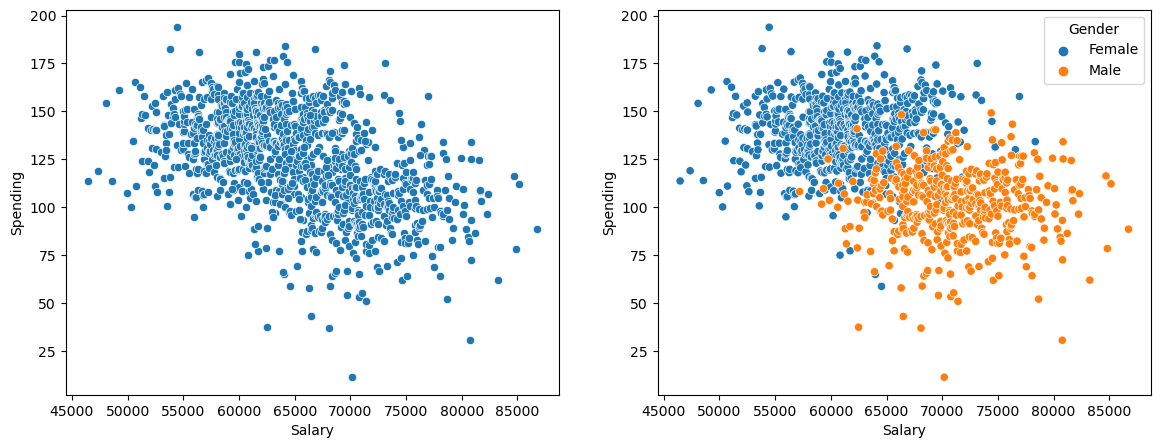

In [30]:
# Create scatter plots of 'Spending' versus 'Salary', one colored by 'Gender' and the other without any categorical division
plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'Salary', y = 'Spending')
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = 'Salary', y = 'Spending', hue = 'Gender');

If *Gender* is not accounted for, there seems to be a negative correlation between *Salary* and *Spending*. But if *Gender* is accounted for, there seems to be no particular correlation between *Salary* and *Spending*.

## Model 8

In [31]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'Spending' using 'Age' and 'Gender'
lr_model_8 = smf.ols("Spending~Age+Gender",data=df)
lr_model_8 = lr_model_8.fit()
print(lr_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     785.1
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          6.57e-215
Time:                        13:17:14   Log-Likelihood:                -4821.0
No. Observations:                1140   AIC:                             9648.
Df Residuals:                    1137   BIC:                             9663.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        170.3763      2.221     76.

According to this model:
- Older people tend to spend less
- Both *Age* and *Gender* are statistically significant
- About 58% of the variation in *Spending* is explained by *Age* and *Gender*

## Model 9

In [32]:
df.columns

Index(['Salary', 'Age', 'State', 'Gender', 'Marital Status', 'Repeat', 'Type',
       'Coupon', 'Spending'],
      dtype='object')

In [33]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'Spending' using all the predictor variables in the data set except 'State'
lr_model_9 = smf.ols("Spending~Salary+Age+Gender+Repeat+Type+Coupon",data=df)
lr_model_9 = lr_model_9.fit()
print(lr_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     284.4
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          1.51e-264
Time:                        13:17:14   Log-Likelihood:                -4687.0
No. Observations:                1140   AIC:                             9392.
Df Residuals:                    1131   BIC:                             9437.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             154.4423    

# Part 3 - Diagnostic Plots
In this section, we will:
- Import necessary packages for executing the code
- Create and analyze diagnostic plots for *lr_model_9*

In [34]:
# Import methods for regression diagnostic plots from 'statsmodels'
from statsmodels.api import ProbPlot, qqplot

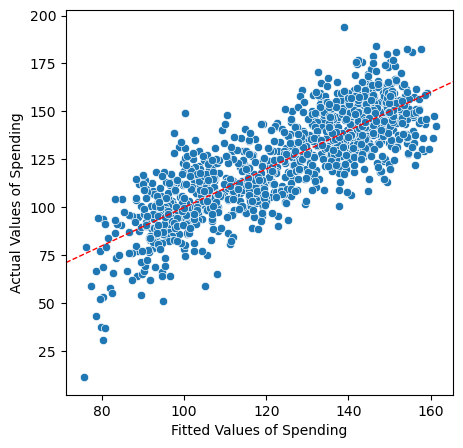

In [35]:
# Create a scatter plot between the fitted and actual values of 'Spending'
plt.figure(figsize = (5, 5))
sns.scatterplot(x = lr_model_9.fittedvalues, y = df['Spending'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Spending')
plt.ylabel('Actual Values of Spending');

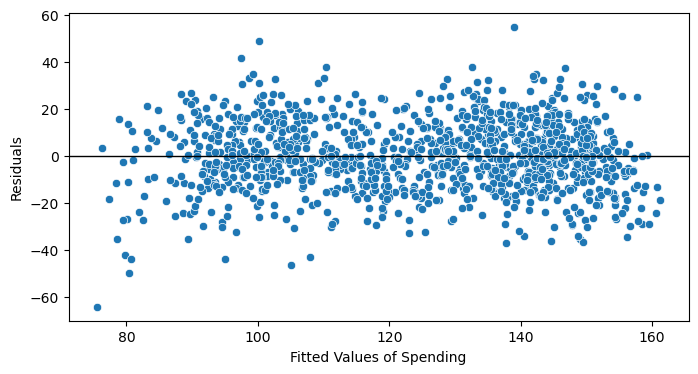

In [36]:
# Create a scatter plot between the fitted values of 'Spending' and the residuals
plt.figure(figsize = (8, 4))
sns.scatterplot(x = lr_model_9.fittedvalues, y = lr_model_9.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.xlabel('Fitted Values of Spending')
plt.ylabel('Residuals');

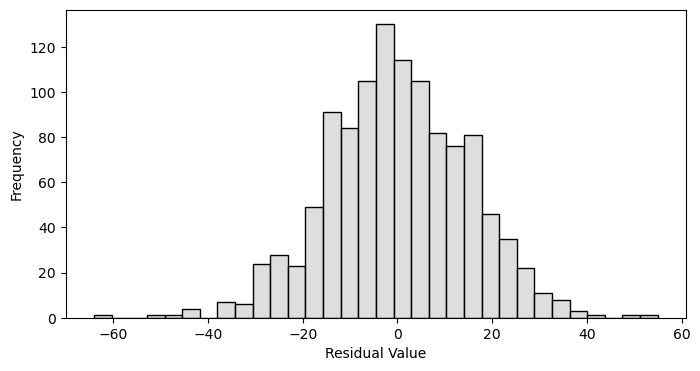

In [37]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = lr_model_9.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

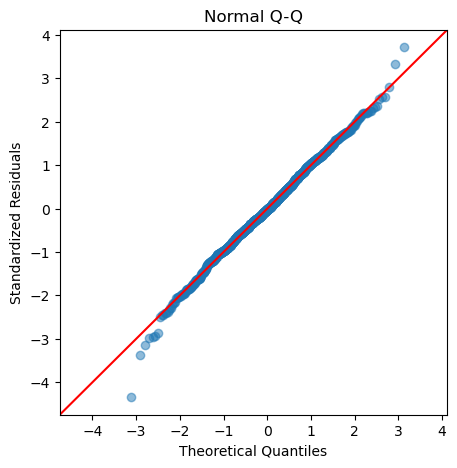

In [38]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_9.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(5, 5)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');